# Neural Network

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv('/Users/DEEPAK/downloads/Datasets/mnist_test.csv')

In [3]:
data.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Shuffling the dataset before splitting in training sets

In [4]:
data=np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [5]:
Y_train

array([0, 6, 9, ..., 4, 1, 2], dtype=int64)

In [6]:
def init_parameters():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_parameters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[3 3 9 ... 9 9 9] [0 6 9 ... 4 1 2]
0.1302366929658851
Iteration:  10
[0 4 9 ... 9 5 9] [0 6 9 ... 4 1 2]
0.24858317590843426
Iteration:  20
[0 2 9 ... 7 7 2] [0 6 9 ... 4 1 2]
0.3345927325258362
Iteration:  30
[0 2 7 ... 7 7 2] [0 6 9 ... 4 1 2]
0.40082231359039894
Iteration:  40
[0 6 7 ... 4 8 2] [0 6 9 ... 4 1 2]
0.4557173019224358
Iteration:  50
[0 6 7 ... 4 8 2] [0 6 9 ... 4 1 2]
0.5049449938882098
Iteration:  60
[0 6 7 ... 4 1 2] [0 6 9 ... 4 1 2]
0.5456161795755083
Iteration:  70
[0 6 7 ... 4 1 2] [0 6 9 ... 4 1 2]
0.579953328147572
Iteration:  80
[0 6 7 ... 4 1 2] [0 6 9 ... 4 1 2]
0.6118457606400711
Iteration:  90
[0 6 7 ... 4 1 2] [0 6 9 ... 4 1 2]
0.6368485387265251
Iteration:  100
[0 6 7 ... 4 1 2] [0 6 9 ... 4 1 2]
0.6600733414823869
Iteration:  110
[0 6 9 ... 4 1 2] [0 6 9 ... 4 1 2]
0.6780753417046338
Iteration:  120
[0 6 9 ... 4 1 2] [0 6 9 ... 4 1 2]
0.6957439715523948
Iteration:  130
[0 6 9 ... 4 1 2] [0 6 9 ... 4 1 2]
0.7089676630736749
Iteration:  140


In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


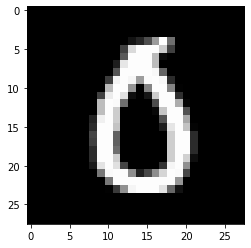

Prediction:  [6]
Label:  6


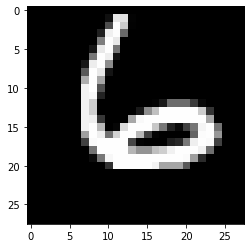

Prediction:  [2]
Label:  2


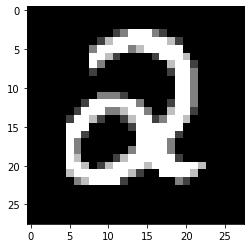

Prediction:  [8]
Label:  6


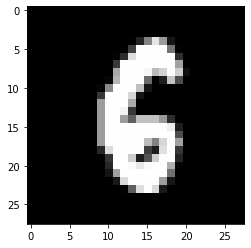

In [9]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)

In [10]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 3 6 4 8 2 5 1 1 1 5 4 5 3 3 4 4 8 3 7 3 7 6 2 3 2 5 3 6 7 1 7 2 3 9 7 6
 1 5 2 4 5 1 7 9 4 4 6 8 2 6 8 0 8 1 5 4 4 9 9 5 1 4 0 6 0 1 1 0 3 9 6 5 6
 4 0 4 0 1 2 5 7 0 6 2 8 7 7 8 8 3 7 6 6 3 5 5 9 4 4 6 7 9 7 2 0 1 1 7 2 2
 8 1 7 1 3 0 7 0 3 3 6 2 4 1 5 1 6 1 0 0 6 5 0 5 6 8 6 1 7 9 6 0 8 0 3 8 5
 9 1 1 7 5 4 8 7 6 3 4 2 9 3 9 3 8 8 0 9 2 8 9 2 4 2 2 9 2 1 7 9 1 8 1 9 7
 1 5 0 1 4 9 6 4 3 4 2 6 2 3 4 4 0 6 1 9 4 7 9 9 6 4 2 1 3 2 0 3 7 4 4 6 8
 2 1 7 7 4 3 4 8 5 2 0 4 3 4 5 6 6 7 2 8 6 5 6 3 8 9 9 7 2 9 3 2 9 7 3 7 1
 7 5 9 0 3 2 3 9 4 8 6 9 7 8 0 7 6 2 2 8 6 2 9 6 7 1 6 8 7 0 1 4 3 7 6 3 9
 4 1 4 1 4 5 2 6 8 9 1 5 9 2 7 1 1 5 0 4 6 8 1 6 1 7 3 5 4 9 3 5 5 7 8 5 3
 2 9 3 7 1 7 5 9 8 1 3 1 2 8 8 2 2 3 2 7 9 9 2 8 4 5 6 3 5 6 9 6 1 7 5 1 0
 7 3 8 8 9 9 9 8 1 3 3 1 9 1 1 4 2 8 9 6 8 4 3 0 8 4 6 1 3 6 1 6 7 0 1 2 6
 7 2 9 0 8 5 3 8 4 1 7 2 0 6 7 4 6 0 5 6 6 8 2 0 5 0 2 5 1 3 4 7 9 3 1 8 4
 1 6 1 6 0 0 8 3 2 1 1 5 1 5 0 6 9 5 6 0 2 1 9 5 1 9 5 9 7 4 6 1 0 6 5 8 8
 4 1 0 0 6 8 4 5 8 9 4 2 

0.835